In [1]:
# set up libraries and plotting
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from matplotlib.dates import MO
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
loc = mdates.WeekdayLocator(byweekday=MO)

In [2]:
# read in hand-copied data from 
# https://socoemergency.org/emergency/novel-coronavirus/resources-information/dashboard/
scdata = pd.read_csv('sonoma-county.csv', index_col='Date', parse_dates=True)
scdata = scdata.sort_index()
scdata = scdata.fillna(0)
scdata['Cumulative'] = scdata['Active'] + scdata['Deaths'] + scdata['Recovered']
scdata.tail()

,Active,New,Deaths,Recovered,Cumulative
Date,,,,,
2020-03-23,27.0,8.0,1.0,1.0,29.0
2020-03-24,34.0,2.0,1.0,2.0,37.0
2020-03-25,34.0,2.0,1.0,4.0,39.0
2020-03-26,41.0,8.0,1.0,5.0,47.0
2020-03-27,40.0,7.0,1.0,13.0,54.0


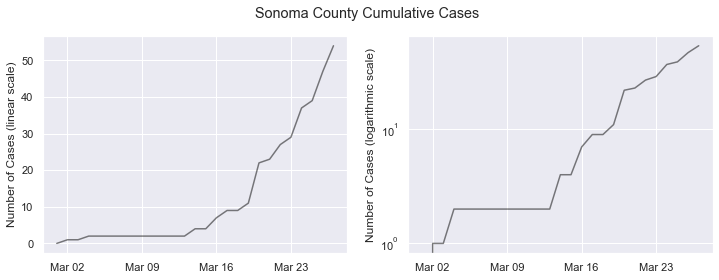

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].xaxis.set_major_locator(loc)
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax[1].xaxis.set_major_locator(loc)
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax[0].plot(scdata.index, scdata['Cumulative'], color='black', alpha=0.5)
ax[0].set_yscale('linear')
ax[1].plot(scdata.index, scdata['Cumulative'], color='black', alpha=0.5)
ax[1].set_yscale('log')
fig.suptitle('Sonoma County Cumulative Cases')
ax[0].set_ylabel('Number of Cases (linear scale)')
ax[1].set_ylabel('Number of Cases (logarithmic scale)')
plt.show()

doubling_time 2.373852053048708
doubling_time 5.195980577866052


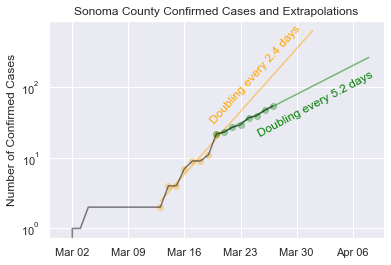

In [4]:
# determine slopes of data and plot
def fit_and_plot(data, ax, color):

    # fit data to exponential
    # polyfit returns highest power first
    sp_x = np.arange(0, len(data), 1)
    growth_rate, log_intercept = np.polyfit(sp_x, np.log(data), 1)

    # create extrapolations
    extrapolated_days = np.arange(0, 20, 1)
    extrapolated_values = np.exp(log_intercept) * np.exp(growth_rate * extrapolated_days)
    extrapolated_dates = [data.index[0] + np.timedelta64(1, 'D') * t for t in extrapolated_days]
    
    # doubling time
    print('doubling_time', 1/growth_rate * np.log(2))
    
    # plot observations and exponential extrapolations
    ax.plot(extrapolated_dates, extrapolated_values, color=color, alpha=0.5)
    ax.plot(data.index, data, linestyle='', marker='o', color=color, alpha=0.3)

fig, ax = plt.subplots()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

# high growth
first_phase = scdata.loc['2020-03-13':'2020-03-20']['Cumulative']
fit_and_plot(first_phase, ax, 'orange')

# low growth
second_phase = scdata.loc['2020-03-20':]['Cumulative']
fit_and_plot(second_phase, ax, 'green')

# total data trend
ax.plot(scdata.index, scdata['Cumulative'], color='black', alpha=0.5)
ax.set_yscale('log')

ax.text(scdata.index[18],30,'Doubling every 2.4 days', color='orange', rotation=48)
ax.text(scdata.index[24],20,'Doubling every 5.2 days', color='green', rotation=28)

ax.set_title('Sonoma County Confirmed Cases and Extrapolations')
ax.set_ylabel('Number of Confirmed Cases')

plt.show()